In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.gridspec import GridSpec
from numpy.typing import NDArray
from scipy.stats import gamma
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

path = "/Users/lin/Code/H1_0712/soilmois05_watersat09"
path3 = "/Users/lin/Code/H1_0712/soilresid03_0509"
path5 = "/Users/lin/Code/H1_0712/conduct0001_0509"
path2 = "/Users/lin/Code/H1_0712/soilmoissatura09_0509"

path_1 = "/Users/lin/Code/H1_0712/k=0_5"
path_2 = "/Users/lin/Code/H1_0712/k=50"


In [3]:
high_experiments = ['0821', "1107", "1710", "7784", "9924"]
low_experiments = ["0290", "0397", "0592", "2304", "9482"]
middle_experiments = [
    "1322", "7580", "9620", "8179", "7600",
    "1214", "9578", "8518", "8688", "0193",
    "0916", "8919", "1598", "8306", "9187"
]

for key in high_experiments:
    globals()[f"cH{key}"] = xr.load_dataset(f"{path}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"cL{key}"] = xr.load_dataset(f"{path}/l{key}/all_continuous_data.nc")

for key in middle_experiments:
    globals()[f"cM{key}"] = xr.load_dataset(f"{path}/m{key}/all_continuous_data.nc")
extent = [
    float(cH0821.x.min()),
    float(cH0821.x.max()),
    float(cH0821.y.min()),
    float(cH0821.y.max()),
]

In [4]:
high_con_vars = [
    'cH0821', 'cH1107', 'cH1710', 'cH7784', 'cH9924'
]
low_con_vars = [
    'cL0290', 'cL0397', 'cL0592', 'cL2304', 'cL9482'
]
high_and_low = high_con_vars + low_con_vars
mid_con_vars = [
    'cM1322', 'cM7580', 'cM9620', 'cM8179', 'cM7600',
    'cM1214', 'cM9578', 'cM8518', 'cM8688', 'cM0193',
    'cM0916', 'cM8919', 'cM1598', 'cM8306', 'cM9187'
]

high_con_monthly_precip_mean = np.zeros((5,24))
high_con_monthly_surrunoff_mean = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars[i]]
    high_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_precip_mean = np.zeros((5,24))
low_con_monthly_surrunoff_mean = np.zeros((5,24))
low_con_monthly_soilmoist_mean = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars[i]]
    low_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

mid_con_monthly_precip_mean = np.zeros((15,24))
mid_con_monthly_surrunoff_mean = np.zeros((15,24))
mid_con_monthly_soilmoist_mean = np.zeros((15,24,14))
for i in range(15):
    ds = globals()[mid_con_vars[i]]
    mid_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    mid_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    mid_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

con_monthly_precip_mean = np.vstack([high_con_monthly_precip_mean, mid_con_monthly_precip_mean, low_con_monthly_precip_mean])
con_monthly_surrunoff_mean = np.vstack([high_con_monthly_surrunoff_mean, mid_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean])
con_monthly_soilmoist_mean = np.vstack([high_con_monthly_soilmoist_mean, mid_con_monthly_soilmoist_mean, low_con_monthly_soilmoist_mean])

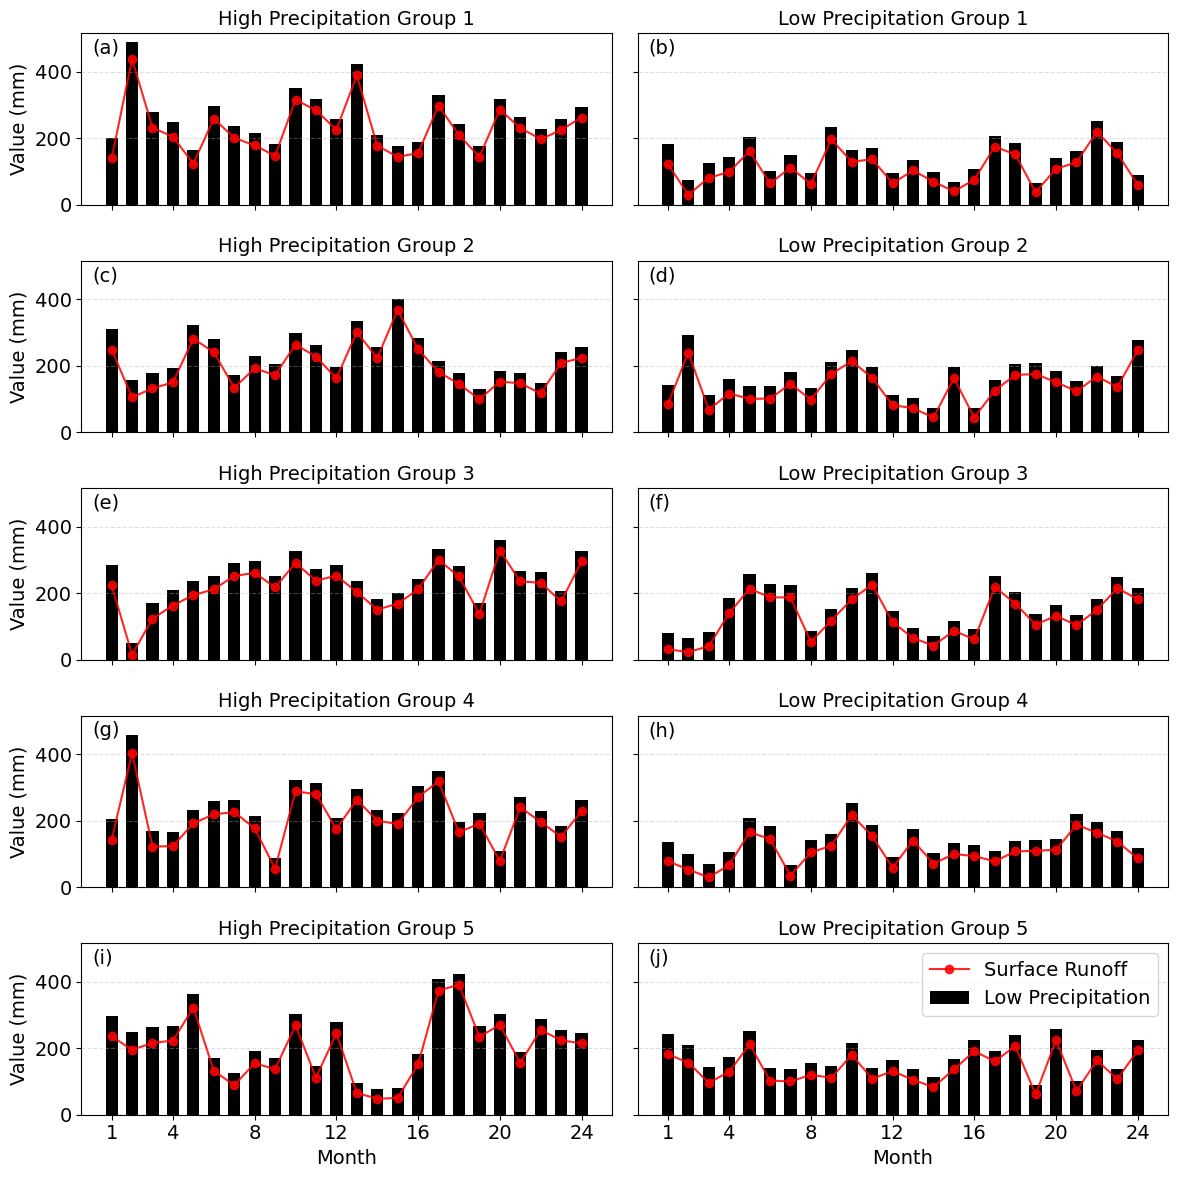

In [111]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()

x = np.arange(1, 25)
max_precip = np.max(con_monthly_precip_mean)
max_runoff = np.max(con_monthly_surrunoff_mean)
xticks = [1] + list(np.arange(4, 24, 4)) + [24]

for i in range(5):
    ax = axes[i * 2]
    precip = high_con_monthly_precip_mean[i, :]
    runoff = high_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)
   
    if i == 4:
        ax.set_xlabel('Month', fontsize=14)
        ax.set_xticks(xticks)

    ax.set_title(f'High Precipitation Group {i+1}', fontsize=14)
    ax.set_ylabel('Value (mm)', fontsize=14)
    ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

for i in range(5):
    ax = axes[i * 2 + 1]
    precip = low_con_monthly_precip_mean[i, :]
    runoff = low_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='Low Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)

    if i == 4:
        ax.set_xlabel('Month', fontsize=14)
        ax.set_xticks(xticks)
        ax.legend(loc='upper right')
        
    ax.set_title(f'Low Precipitation Group {i+1}', fontsize=14)
    ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

text = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)','(h)', '(i)', '(j)']
for i in range(10):
    ax = axes[i]
    ax.text(0.02, 0.88, text[i], transform=ax.transAxes, fontsize=14)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
plt.show()

/var/folders/f4/zsmx3qz54tb44jplrqt8yrr40000gn/T/ipykernel_5838/443919966.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([runoff_ratio_hl[i] for i in range(10)], labels=group_labels_hl)


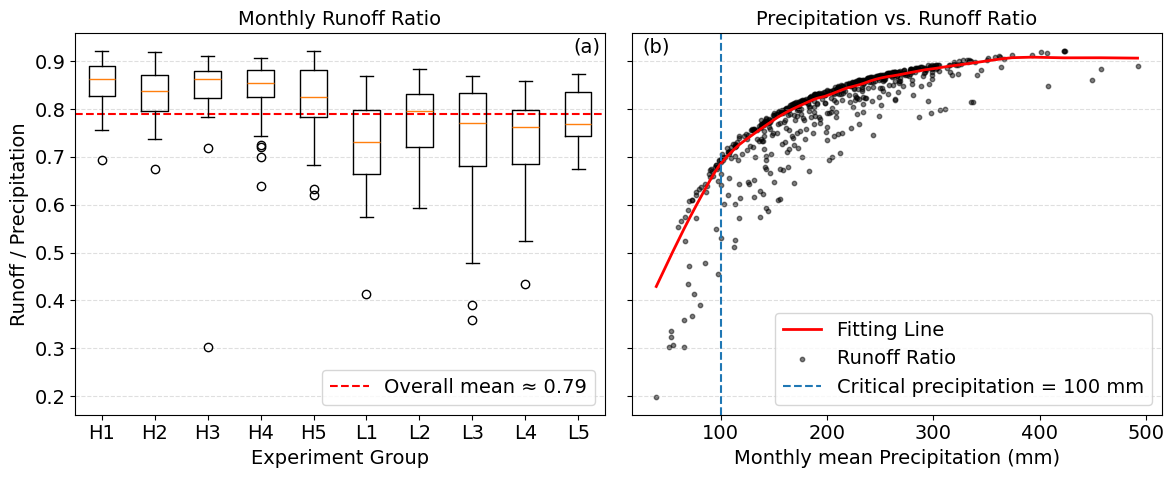

In [162]:
with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio_hl = np.vstack([high_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean]) / np.vstack([high_con_monthly_precip_mean, low_con_monthly_precip_mean])   
    runoff_ratio_hl = np.nan_to_num(runoff_ratio_hl, nan=0.0, posinf=0.0, neginf=0.0)
with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio = con_monthly_surrunoff_mean / con_monthly_precip_mean
    runoff_ratio = np.nan_to_num(runoff_ratio, nan=0.0, posinf=0.0, neginf=0.0)
precip_flat = con_monthly_precip_mean.flatten()
runoff_ratio_flat = runoff_ratio.flatten()

group_labels_hl = [f'H{i+1}' for i in range(5)] + [f'L{i+1}' for i in range(5)]

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

all_values = [v for i in range(10) for v in runoff_ratio_hl[i]]
overall_mean = round(np.mean(all_values), 2)
ax.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label='Overall mean ≈ 0.79')
ax.boxplot([runoff_ratio_hl[i] for i in range(10)], labels=group_labels_hl)
ax.set_xlabel('Experiment Group', fontsize=14)
ax.set_ylabel('Runoff / Precipitation', fontsize=14)
ax.set_title('Monthly Runoff Ratio', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(loc='lower right')

lowess_fit = lowess(runoff_ratio_flat, precip_flat, frac=0.15)
ax1.plot(lowess_fit[:, 0], lowess_fit[:, 1], color='red', linewidth=2, label='Fitting Line')
ax1.scatter(precip_flat, runoff_ratio_flat, alpha=0.5, s=10, color='black', label='Runoff Ratio')
ax1.set_xlabel("Monthly mean Precipitation (mm)", fontsize=14)
ax1.set_title("Precipitation vs. Runoff Ratio", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.axvline(x=100, color='#1f77b4', linestyle='--', linewidth=1.5, label='Critical precipitation = 100 mm')
ax1.legend(loc='lower right')

ax.text(0.94, 0.95, '(a)', transform=ax.transAxes, fontsize=14)
ax1.text(0.02, 0.95, '(b)', transform=ax1.transAxes, fontsize=14)

fig.tight_layout()
plt.show()

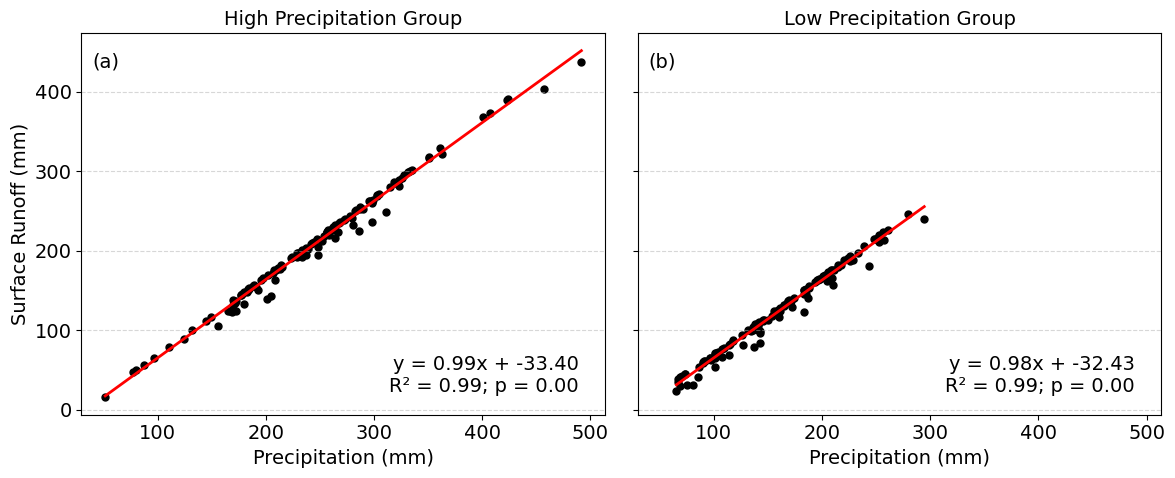

In [ ]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# 高降水组
all_precip_high = []
all_runoff_high = []

for i in range(5):
    precip = high_con_monthly_precip_mean[i, :].flatten()
    runoff = high_con_monthly_surrunoff_mean[i, :].flatten()
    all_precip_high.extend(precip)
    all_runoff_high.extend(runoff)

ax1.scatter(all_precip_high, all_runoff_high, color='k', s=25)
slope, intercept, r_value, p_value, std_err = linregress(all_precip_high, all_runoff_high)
x_line = np.linspace(min(all_precip_high), max(all_precip_high), 100)
y_line = slope * x_line + intercept
ax1.plot(x_line, y_line, color='r', linewidth=2)

textstr = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}; p = {p_value:.2f}'
ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=14, verticalalignment='bottom', horizontalalignment='right')

ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=14, verticalalignment='top')

ax1.set_title('High Precipitation Group', fontsize=14)
ax1.set_xlabel('Precipitation (mm)', fontsize=14)
ax1.set_ylabel('Surface Runoff (mm)', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

all_precip_low = []
all_runoff_low = []

for i in range(5):
    precip = low_con_monthly_precip_mean[i, :].flatten()
    runoff = low_con_monthly_surrunoff_mean[i, :].flatten()
    all_precip_low.extend(precip)
    all_runoff_low.extend(runoff)

ax2.scatter(all_precip_low, all_runoff_low, color='k', s=25)
slope, intercept, r_value, p_value, std_err = linregress(all_precip_low, all_runoff_low)
x_line = np.linspace(min(all_precip_low), max(all_precip_low), 100)
y_line = slope * x_line + intercept
ax2.plot(x_line, y_line, color='r', linewidth=2)

textstr = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}; p = {p_value:.2f}'
ax2.text(0.95, 0.05, textstr, transform=ax2.transAxes,
         fontsize=14, verticalalignment='bottom', horizontalalignment='right')

ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14, verticalalignment='top')

ax2.set_title('Low Precipitation Group', fontsize=14)
ax2.set_xlabel('Precipitation (mm)', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [7]:
np.mean(runoff_ratio_hl[:])

np.float64(0.7882172070053073)

In [129]:
ratios_high = np.concatenate(runoff_ratio_hl[0:5]) 
ratios_low  = np.concatenate(runoff_ratio_hl[5:10])
mean_high = np.mean(ratios_high)
std_high = np.std(ratios_high)
cov_high = std_high / mean_high
mean_low = np.mean(ratios_low)
std_low = np.std(ratios_low)
cov_low = std_low / mean_low

print(f"High precipitation group:")
print(f"  Mean = {mean_high:.3f}, Std = {std_high:.3f}, COV = {cov_high:.3f}")
print(f"High group min = {np.min(ratios_high):.3f}, max = {np.max(ratios_high):.3f}")

print(f"\nLow precipitation group:")
print(f"  Mean = {mean_low:.3f}, Std = {std_low:.3f}, COV = {cov_low:.3f}")
print(f"Low  group min = {np.min(ratios_low):.3f}, max = {np.max(ratios_low):.3f}")

High precipitation group:
  Mean = 0.832, Std = 0.080, COV = 0.096
High group min = 0.302, max = 0.922

Low precipitation group:
  Mean = 0.745, Std = 0.107, COV = 0.143
Low  group min = 0.360, max = 0.884


In [9]:
for key in high_experiments:
    globals()[f"c2H{key}"] = xr.load_dataset(f"{path2}/h{key}/all_continuous_data.nc")
for key in low_experiments:
    globals()[f"c2L{key}"] = xr.load_dataset(f"{path2}/l{key}/all_continuous_data.nc")
high_con_vars2 = [
    'c2H0821', 'c2H1107', 'c2H1710', 'c2H7784', 'c2H9924'
]
low_con_vars2 = [
    'c2L0290', 'c2L0397', 'c2L0592', 'c2L2304', 'c2L9482'
]

high_con_monthly_surrunoff_mean2 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean2 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars2[i]]
    high_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean2[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
high_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean, high_con_monthly_surrunoff_mean2])

low_con_monthly_surrunoff_mean2 = np.zeros((5,24))
low_con_monthly_soilmoist_mean2 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars2[i]]
    low_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean2[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean2])

con_monthly_surrunoff_mean0 = np.vstack([high_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean])
con_monthly_surrunoff_mean2 = np.vstack([high_con_monthly_surrunoff_mean2, low_con_monthly_surrunoff_mean2])
con_monthly_soilmoist_mean2 = np.vstack([high_con_monthly_soilmoist_mean2, low_con_monthly_soilmoist_mean2])

runoff_diff2 = con_monthly_surrunoff_mean2 - con_monthly_surrunoff_mean0
high_runoff_diff2 = high_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean
low_runoff_diff2 = low_con_monthly_surrunoff_mean2 - low_con_monthly_surrunoff_mean
runoff_diff_mean2 = np.mean(runoff_diff2, axis=0)
high_runoff_diff_mean2 = np.mean(high_runoff_diff2, axis=0)
low_runoff_diff_mean2 = np.mean(low_runoff_diff2, axis=0)

In [130]:
for key in high_experiments:
    globals()[f"c3H{key}"] = xr.load_dataset(f"{path3}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c3L{key}"] = xr.load_dataset(f"{path3}/l{key}/all_continuous_data.nc")

high_con_vars3 = [
    'c3H0821', 'c3H1107', 'c3H1710', 'c3H7784', 'c3H9924'
]
low_con_vars3 = [
    'c3L0290', 'c3L0397', 'c3L0592', 'c3L2304', 'c3L9482'
]

high_con_monthly_surrunoff_mean3 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean3 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars3[i]]
    high_con_monthly_surrunoff_mean3[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean3[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_surrunoff_mean3 = np.zeros((5,24))
low_con_monthly_soilmoist_mean3 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars3[i]]
    low_con_monthly_surrunoff_mean3[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean3[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_surrunoff_compare3 = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean3])

con_monthly_surrunoff_mean3 = np.vstack([high_con_monthly_surrunoff_mean3, low_con_monthly_surrunoff_mean3])
con_monthly_soilmoist_mean3 = np.vstack([high_con_monthly_soilmoist_mean3, low_con_monthly_soilmoist_mean3])

runoff_diff3 = con_monthly_surrunoff_mean3 - con_monthly_surrunoff_mean0
runoff_diff_mean3 = np.mean(runoff_diff3, axis=0)
high_runoff_diff3 = high_con_monthly_surrunoff_mean3 - high_con_monthly_surrunoff_mean
high_runoff_diff_mean3 = np.mean(high_runoff_diff3, axis=0)
low_runoff_diff3 = low_con_monthly_surrunoff_mean3 - low_con_monthly_surrunoff_mean
low_runoff_diff_mean3 = np.mean(low_runoff_diff3, axis=0)

with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio3 = np.vstack([high_con_monthly_surrunoff_mean3, low_con_monthly_surrunoff_mean3]) / np.vstack([high_con_monthly_precip_mean, low_con_monthly_precip_mean])   
    runoff_ratio3 = np.nan_to_num(runoff_ratio3, nan=0.0, posinf=0.0, neginf=0.0)
runoff_ratio_diff3 = runoff_ratio3 - runoff_ratio_hl

In [131]:
for key in high_experiments:
    globals()[f"c5H{key}"] = xr.load_dataset(f"{path5}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c5L{key}"] = xr.load_dataset(f"{path5}/l{key}/all_continuous_data.nc")

high_con_vars5 = [
    'c5H0821', 'c5H1107', 'c5H1710', 'c5H7784', 'c5H9924'
]
low_con_vars5 = [
    'c5L0290', 'c5L0397', 'c5L0592', 'c5L2304', 'c5L9482'
]

high_con_monthly_surrunoff_mean5 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean5 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars5[i]]
    high_con_monthly_surrunoff_mean5[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean5[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_surrunoff_mean5 = np.zeros((5,24))
low_con_monthly_soilmoist_mean5 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars5[i]]
    low_con_monthly_surrunoff_mean5[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean5[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_surrunoff_compare5 = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean5])

con_monthly_surrunoff_mean5 = np.vstack([high_con_monthly_surrunoff_mean5, low_con_monthly_surrunoff_mean5])
con_monthly_soilmoist_mean5 = np.vstack([high_con_monthly_soilmoist_mean5, low_con_monthly_soilmoist_mean5])

runoff_diff5 = con_monthly_surrunoff_mean5 - con_monthly_surrunoff_mean0
runoff_diff_mean5 = np.mean(runoff_diff5, axis=0)
high_runoff_diff5 = high_con_monthly_surrunoff_mean5 - high_con_monthly_surrunoff_mean
high_runoff_diff_mean5 = np.mean(high_runoff_diff5, axis=0)
low_runoff_diff5 = low_con_monthly_surrunoff_mean5 - low_con_monthly_surrunoff_mean
low_runoff_diff_mean5 = np.mean(low_runoff_diff5, axis=0)

with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio5 = np.vstack([high_con_monthly_surrunoff_mean5, low_con_monthly_surrunoff_mean5]) / np.vstack([high_con_monthly_precip_mean, low_con_monthly_precip_mean])   
    runoff_ratio5 = np.nan_to_num(runoff_ratio5, nan=0.0, posinf=0.0, neginf=0.0)
runoff_ratio_diff5 = runoff_ratio5 - runoff_ratio_hl

In [12]:
mean_high_con_monthly_surrunoff_mean = np.mean(high_con_monthly_surrunoff_mean, axis=0)
mean_low_con_monthly_surrunoff_mean = np.mean(low_con_monthly_surrunoff_mean, axis=0)
mean_high_con_monthly_surrunoff_mean2 = np.mean(high_con_monthly_surrunoff_mean2, axis=0)
mean_low_con_monthly_surrunoff_mean2 = np.mean(low_con_monthly_surrunoff_mean2, axis=0)

In [80]:
high_soilmois_diff2 = high_con_monthly_soilmoist_mean2[:,:,12] - high_con_monthly_soilmoist_mean[:,:,12]
low_soilmois_diff2 = low_con_monthly_soilmoist_mean2[:,:,12] - low_con_monthly_soilmoist_mean[:,:,12]
high_soilmois_diff_mean2 = np.nanmean(high_soilmois_diff2, axis=0)
low_soilmois_diff_mean2 = np.nanmean(low_soilmois_diff2, axis=0)

high_soilmois_diff3 = high_con_monthly_soilmoist_mean3[:,:,12] - high_con_monthly_soilmoist_mean[:,:,12]
low_soilmois_diff3 = low_con_monthly_soilmoist_mean3[:,:,12] - low_con_monthly_soilmoist_mean[:,:,12]
high_soilmois_diff_mean3 = np.nanmean(high_soilmois_diff3, axis=0)
low_soilmois_diff_mean3 = np.nanmean(low_soilmois_diff3, axis=0)

high_soilmois_diff5 = high_con_monthly_soilmoist_mean5[:,:,12] - high_con_monthly_soilmoist_mean[:,:,12]
low_soilmois_diff5 = low_con_monthly_soilmoist_mean5[:,:,12] - low_con_monthly_soilmoist_mean[:,:,12]
high_soilmois_diff_mean5 = np.nanmean(high_soilmois_diff5, axis=0)
low_soilmois_diff_mean5 = np.nanmean(low_soilmois_diff5, axis=0)

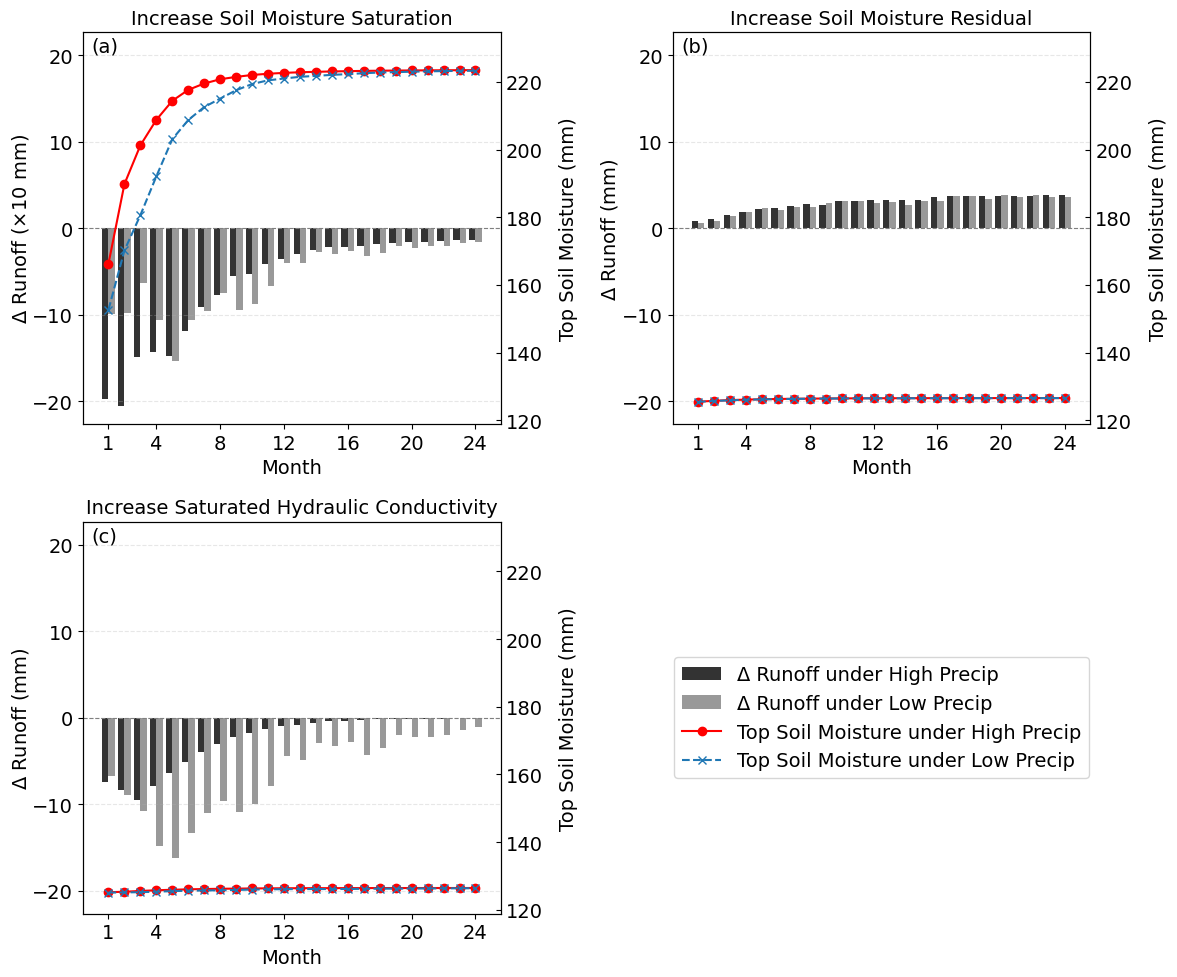

In [88]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean2, high_runoff_diff_mean3, high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean2,  low_runoff_diff_mean3,  low_runoff_diff_mean5]

high_soilmois = [np.nanmean(high_con_monthly_soilmoist_mean2[:,:,12], axis=0),
                 np.nanmean(high_con_monthly_soilmoist_mean3[:,:,12], axis=0),
                 np.nanmean(high_con_monthly_soilmoist_mean5[:,:,12], axis=0)]
low_soilmois  = [np.nanmean(low_con_monthly_soilmoist_mean2[:,:,12], axis=0),
                 np.nanmean(low_con_monthly_soilmoist_mean3[:,:,12], axis=0),
                 np.nanmean(low_con_monthly_soilmoist_mean5[:,:,12], axis=0)]

titles = ['Increase Soil Moisture Saturation',
          'Increase Soil Moisture Residual',
          'Increase Saturated Hydraulic Conductivity']

high_y_list[0] = high_y_list[0] / 10
low_y_list[0]  = low_y_list[0]  / 10

all_vals = np.concatenate(high_y_list + low_y_list)
ymax = np.max(np.abs(all_vals)) * 1.10
ymin, ymax = -ymax, ymax

sm_all = np.concatenate(high_soilmois + low_soilmois)
sm_ymax = np.max(sm_all) * 1.05
sm_ymin = np.min(sm_all) * 0.95

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)

def plot_pair(ax, high_y, low_y, high_sm, low_sm, title, ylabel, ymin, ymax, sm_ymin, sm_ymax):
    x_high, x_low = x - bar_width/2, x + bar_width/2
    ax.bar(x_high, high_y, width=bar_width, color='k', alpha=0.8, label='High Precip')
    ax.bar(x_low,  low_y,  width=bar_width, color='grey', alpha=0.8, label='Low Precip')
    ax.set_ylim(ymin, ymax)

    ax2 = ax.twinx()
    ax2.plot(x, high_sm, color='red', marker='o', label='High SM')
    ax2.plot(x, low_sm,  color='#1f77b4', marker='x', linestyle='--', label='Low SM')
    ax2.set_ylim(sm_ymin, sm_ymax)
    ax2.set_ylabel('Top Soil Moisture (mm)', fontsize=14, labelpad=12)
    ax2.tick_params(axis='y', which='both', direction='in', right=True)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=1)
    xticks = [1] + list(np.arange(4, 24, 4)) + [24]
    ax.set_xticks(xticks)
    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.grid(True, axis='y', ls='--', alpha=0.3)

ax1 = fig.add_subplot(gs[0,0])
plot_pair(ax1, high_y_list[0], low_y_list[0], high_soilmois[0], low_soilmois[0],
          titles[0], r'$\Delta$ Runoff (×10 mm)', ymin, ymax, sm_ymin, sm_ymax)

ax2 = fig.add_subplot(gs[0,1], sharex=ax1, sharey=ax1)
plot_pair(ax2, high_y_list[1], low_y_list[1], high_soilmois[1], low_soilmois[1],
          titles[1], r'$\Delta$ Runoff (mm)', ymin, ymax, sm_ymin, sm_ymax)

ax3 = fig.add_subplot(gs[1,0], sharex=ax1, sharey=ax1)
plot_pair(ax3, high_y_list[2], low_y_list[2], high_soilmois[2], low_soilmois[2],
          titles[2], r'$\Delta$ Runoff (mm)', ymin, ymax, sm_ymin, sm_ymax)


legend_elements = [
    Patch(facecolor='k', alpha=0.8, label='Δ Runoff under High Precip'),
    Patch(facecolor='grey', alpha=0.8, label='Δ Runoff under Low Precip'),
    Line2D([0], [0], color='red', marker='o', linestyle='-', label='Top Soil Moisture under High Precip'),
    Line2D([0], [0], color='#1f77b4', marker='x', linestyle='--', label='Top Soil Moisture under Low Precip')
]
ax_legend = fig.add_subplot(gs[1,1])
ax_legend.axis('off')
ax_legend.legend(handles=legend_elements, loc='center', fontsize=14)

ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14)
ax3.text(0.02, 0.95, '(c)', transform=ax3.transAxes, fontsize=14)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
plt.show()

In [137]:
runoff_ratio_diff3

array([[0.00424897, 0.00240841, 0.00543308, 0.00765839, 0.01303305,
        0.00814466, 0.01119154, 0.01322669, 0.01521638, 0.00887862,
        0.01016139, 0.01280442, 0.00808159, 0.01629131, 0.01914047,
        0.01876407, 0.01110591, 0.01529702, 0.02112787, 0.01179412,
        0.01438771, 0.01626503, 0.01471861, 0.01299486],
       [0.00243307, 0.00720087, 0.00834249, 0.0092112 , 0.00679299,
        0.00862349, 0.01441816, 0.01213883, 0.01362917, 0.0104067 ,
        0.01211038, 0.01637512, 0.01017039, 0.01365495, 0.00889411,
        0.01272491, 0.01701758, 0.02036381, 0.02766239, 0.01995716,
        0.02067789, 0.02490593, 0.01593668, 0.01486122],
       [0.00249365, 0.01079406, 0.00828704, 0.00909626, 0.00968507,
        0.00939393, 0.00907084, 0.00917717, 0.01149372, 0.00953027,
        0.01159614, 0.01122055, 0.01419147, 0.01824051, 0.01712122,
        0.01493576, 0.01085822, 0.01310851, 0.0210461 , 0.01048163,
        0.01407403, 0.01433093, 0.01829506, 0.01170136],
       [0.004

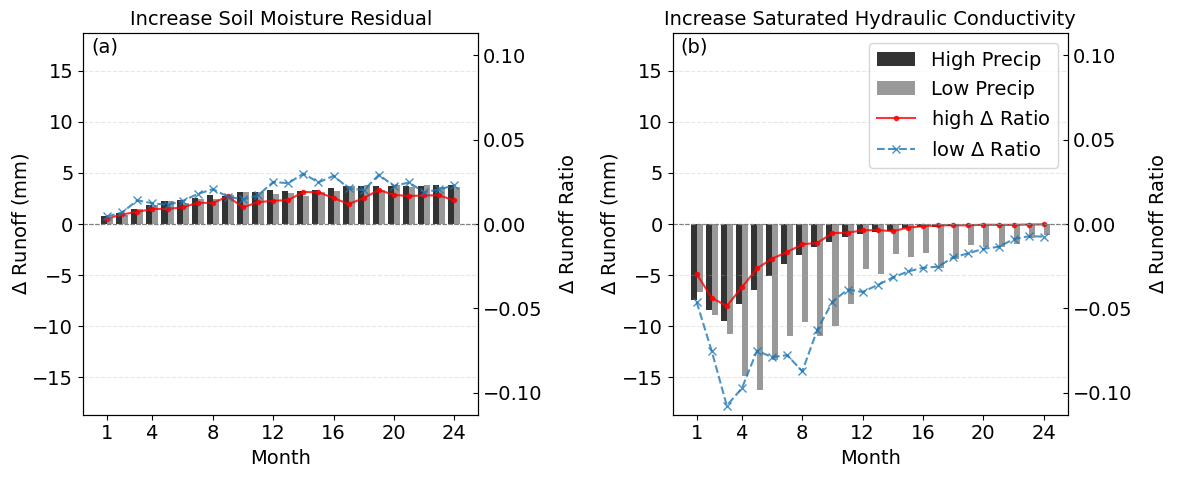

In [150]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean3, high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean3,  low_runoff_diff_mean5]

high_deltaratios = [np.nanmean(runoff_ratio_diff3[0:5, :], axis=0),
                    np.nanmean(runoff_ratio_diff5[0:5, :], axis=0)]
low_deltaratios  = [np.nanmean(runoff_ratio_diff3[5:10, :], axis=0),
                    np.nanmean(runoff_ratio_diff5[5:10, :], axis=0)]

titles = ['Increase Soil Moisture Residual', 'Increase Saturated Hydraulic Conductivity']

all_vals = np.concatenate(high_y_list + low_y_list)
ymax_abs = np.max(np.abs(all_vals))
pad1 = 0.15 * ymax_abs if ymax_abs > 0 else 1.0
ymin, ymax = -(ymax_abs + pad1), (ymax_abs + pad1)

dratio_all = np.concatenate(high_deltaratios + low_deltaratios)
dr_abs = np.max(np.abs(dratio_all))
pad2 = 0.05 * dr_abs if dr_abs > 0 else 0.1
dratio_ymin, dratio_ymax = -(dr_abs + pad2), (dr_abs + pad2)

fig = plt.figure(figsize=(12, 5))
gs  = GridSpec(1, 2, figure=fig)

def plot_pair(ax, high_y, low_y, high_dratio, low_dratio, title, ylabel):
    x_high, x_low = x - bar_width/2, x + bar_width/2

    b1 = ax.bar(x_high, high_y, width=bar_width, color='k',    alpha=0.8, label='High Precip')
    b2 = ax.bar(x_low,  low_y,  width=bar_width, color='grey', alpha=0.8, label='Low Precip')
    ax.set_ylim(ymin, ymax)
    ax.axhline(0, color='gray', ls='--', lw=0.8)

    ax2 = ax.twinx()
    l1, = ax2.plot(x, high_dratio, color='red',      marker='o',  label=r'high $\Delta$ Ratio', markersize=3, alpha=0.8)
    l2, = ax2.plot(x, low_dratio,  color='#1f77b4',  marker='x',  linestyle='--', label=r'low $\Delta$ Ratio', alpha=0.8)
    ax2.set_ylim(dratio_ymin, dratio_ymax)          
    ax2.axhline(0, color='gray', ls='--', lw=0.8)   
    ax2.set_ylabel(r'$\Delta$ Runoff Ratio', fontsize=14, labelpad=12)
    ax2.tick_params(axis='y', which='both', direction='in', right=True)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=1)
    ax.set_xticks([1] + list(np.arange(4, 24, 4)) + [24])
    ax.grid(True, axis='y', ls='--', alpha=0.3)

    return (b1, b2, l1, l2, ax2)

ax1 = fig.add_subplot(gs[0, 0])
h1 = plot_pair(ax1, high_y_list[0], low_y_list[0],
               high_deltaratios[0], low_deltaratios[0],
               titles[0], r'$\Delta$ Runoff (mm)')

ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
h2 = plot_pair(ax2, high_y_list[1], low_y_list[1],
               high_deltaratios[1], low_deltaratios[1],
               titles[1], r'$\Delta$ Runoff (mm)')

ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14)

handles = [h2[0], h2[1], h2[2], h2[3]]
labels  = ['High Precip', 'Low Precip', r'high $\Delta$ Ratio', r'low $\Delta$ Ratio']
h2[4].legend(handles, labels, loc='upper right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
plt.show()

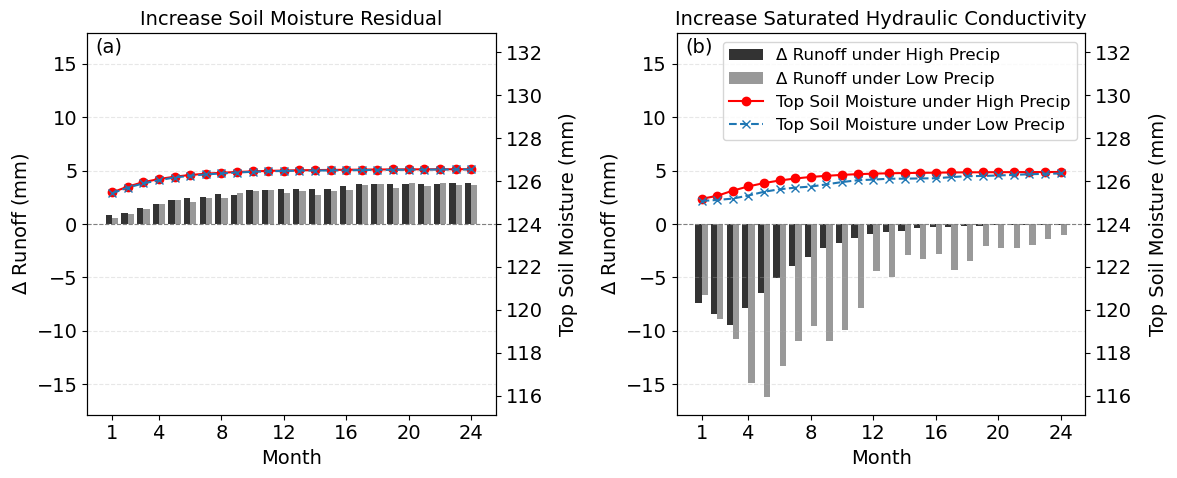

In [ ]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean3, high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean3,  low_runoff_diff_mean5]

high_soilmois = [np.nanmean(high_con_monthly_soilmoist_mean3[:,:,12], axis=0),
                 np.nanmean(high_con_monthly_soilmoist_mean5[:,:,12], axis=0)]
low_soilmois  = [np.nanmean(low_con_monthly_soilmoist_mean3[:,:,12], axis=0),
                 np.nanmean(low_con_monthly_soilmoist_mean5[:,:,12], axis=0)]

titles = ['Increase Soil Moisture Residual',
          'Increase Saturated Hydraulic Conductivity']
all_vals = np.concatenate(high_y_list + low_y_list)
ymax = np.max(np.abs(all_vals)) * 1.10
ymin, ymax = -ymax, ymax

sm_all = np.concatenate(high_soilmois + low_soilmois)
sm_ymax = np.max(sm_all) * 1.05
sm_ymin = np.min(sm_all) * 0.95

center_val = 124
range_val = max(center_val - sm_ymin, sm_ymax - center_val)
sm_ymin_centered = center_val - range_val
sm_ymax_centered = center_val + range_val

fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

def plot_pair(ax, high_y, low_y, high_sm, low_sm, title, ylabel, ymin, ymax, sm_ymin, sm_ymax):

    x_high, x_low = x - bar_width/2, x + bar_width/2
    ax.bar(x_high, high_y, width=bar_width, color='k', alpha=0.8, label='High Precip')
    ax.bar(x_low,  low_y,  width=bar_width, color='grey', alpha=0.8, label='Low Precip')
    ax.set_ylim(ymin, ymax)
    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    xticks = [1] + list(np.arange(4, 24, 4)) + [24]
    ax.set_xticks(xticks)
    ax.grid(True, axis='y', ls='--', alpha=0.3)
    ax.set_title(title, fontsize=14)

    ax2 = ax.twinx()
    ax2.plot(x, high_sm, color='red', marker='o', label='High SM')
    ax2.plot(x, low_sm,  color='#1f77b4', marker='x', linestyle='--', label='Low SM')
    ax2.set_ylim(sm_ymin, sm_ymax)
    ax2.set_ylabel('Top Soil Moisture (mm)', fontsize=14, labelpad=12)

ax1 = fig.add_subplot(gs[0,0])
plot_pair(ax1, high_y_list[0], low_y_list[0], high_soilmois[0], low_soilmois[0],
          titles[0], r'$\Delta$ Runoff (mm)', ymin, ymax, sm_ymin_centered, sm_ymax_centered)

ax2 = fig.add_subplot(gs[0,1], sharex=ax1, sharey=ax1)
plot_pair(ax2, high_y_list[1], low_y_list[1], high_soilmois[1], low_soilmois[1],
          titles[1], r'$\Delta$ Runoff (mm)', ymin, ymax, sm_ymin_centered, sm_ymax_centered)

legend_elements = [
    Patch(facecolor='k', alpha=0.8, label='Δ Runoff under High Precip'),
    Patch(facecolor='grey', alpha=0.8, label='Δ Runoff under Low Precip'),
    Line2D([0], [0], color='red', marker='o', linestyle='-', label='Top Soil Moisture under High Precip'),
    Line2D([0], [0], color='#1f77b4', marker='x', linestyle='--', label='Top Soil Moisture under Low Precip')
]
ax2.legend(handles=legend_elements, fontsize=12, loc='upper right')

ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
plt.show()

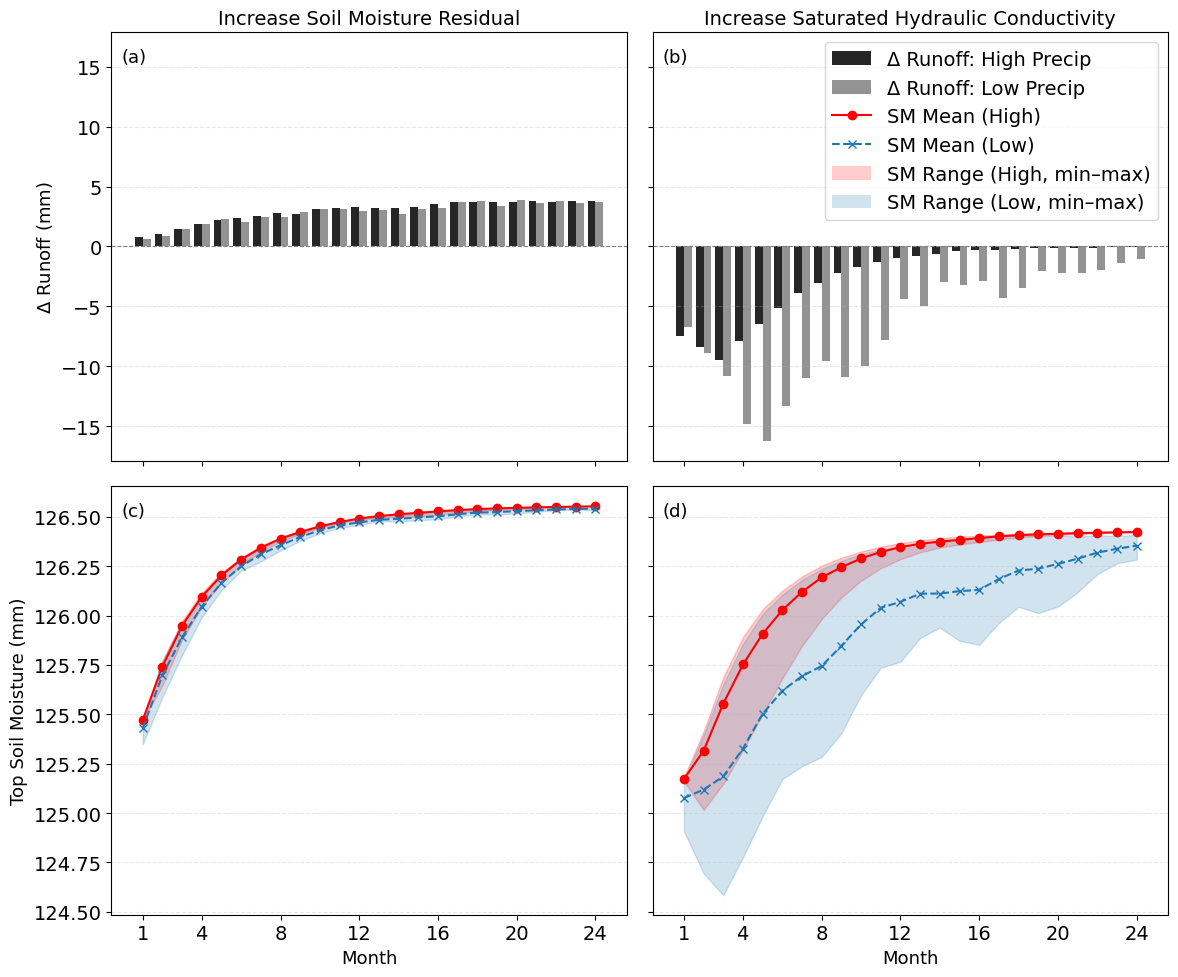

In [ ]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean3, high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean3,  low_runoff_diff_mean5]


titles = ['Increase Soil Moisture Residual',
          'Increase Saturated Hydraulic Conductivity']

all_bar_vals = np.concatenate(high_y_list + low_y_list)
bar_ymax = np.max(np.abs(all_bar_vals)) * 1.10
bar_ymin, bar_ymax = -bar_ymax, bar_ymax

def sm_stats(arr):
    """对给定 3D 数组 arr 取第 12 层，在 axis=0（月份）上：
       返回 (mean_24, min_24, max_24)，长度均为 24
    """
    layer = arr[:, :, 12]                     
    mean_ = np.nanmean(layer, axis=0)         # (24,)
    min_  = np.nanmin(layer,  axis=0)         # (24,)
    max_  = np.nanmax(layer,  axis=0)         # (24,)
    return mean_, min_, max_

sm_high_mean_0, sm_high_min_0, sm_high_max_0 = sm_stats(high_con_monthly_soilmoist_mean3)
sm_low_mean_0,  sm_low_min_0,  sm_low_max_0  = sm_stats(low_con_monthly_soilmoist_mean3)

sm_high_mean_1, sm_high_min_1, sm_high_max_1 = sm_stats(high_con_monthly_soilmoist_mean5)
sm_low_mean_1,  sm_low_min_1,  sm_low_max_1  = sm_stats(low_con_monthly_soilmoist_mean5)

sm_global_min = np.nanmin([sm_high_min_0.min(), sm_low_min_0.min(),
                           sm_high_min_1.min(), sm_low_min_1.min()])
sm_global_max = np.nanmax([sm_high_max_0.max(), sm_low_max_0.max(),
                           sm_high_max_1.max(), sm_low_max_1.max()])
pad = 0.05 * (sm_global_max - sm_global_min) if np.isfinite(sm_global_max - sm_global_min) else 0
sm_ylim = (sm_global_min - pad, sm_global_max + pad)

fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(12, 10),     
    sharex=True,
    sharey='row'
)

for j in range(2):
    ax = axes[0, j]
    high_y = high_y_list[j]
    low_y  =  low_y_list[j]

    x_high, x_low = x - bar_width/2, x + bar_width/2
    ax.bar(x_high, high_y, width=bar_width, color='k',    alpha=0.85, label='High Precip')
    ax.bar(x_low,   low_y,  width=bar_width, color='grey', alpha=0.85, label='Low Precip')

    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.set_ylim(bar_ymin, bar_ymax)
    ax.set_title(titles[j], fontsize=14)
    ax.grid(True, axis='y', ls='--', alpha=0.3)

    if j == 0:
        ax.set_ylabel(r'$\Delta$ Runoff (mm)', fontsize=13)
    else:
        ax.tick_params(labelleft=False)

for j in range(2):
    ax = axes[1, j]
    if j == 0:
        sm_high_mean, sm_high_min, sm_high_max = sm_high_mean_0, sm_high_min_0, sm_high_max_0
        sm_low_mean,  sm_low_min,  sm_low_max  = sm_low_mean_0,  sm_low_min_0,  sm_low_max_0
    else:
        sm_high_mean, sm_high_min, sm_high_max = sm_high_mean_1, sm_high_min_1, sm_high_max_1
        sm_low_mean,  sm_low_min,  sm_low_max  = sm_low_mean_1,  sm_low_min_1,  sm_low_max_1

    ax.fill_between(x, sm_high_min, sm_high_max, alpha=0.20, color='red')
    ax.fill_between(x, sm_low_min,  sm_low_max,  alpha=0.20, color='#1f77b4')

    ax.plot(x, sm_high_mean, marker='o',  label='High SM', color='red')
    ax.plot(x, sm_low_mean,  marker='x', linestyle='--', label='Low SM', color='#1f77b4')

    ax.set_ylim(*sm_ylim)
    ax.grid(True, axis='y', ls='--', alpha=0.25)

    if j == 0:
        ax.set_ylabel('Top Soil Moisture (mm)', fontsize=13)
    else:
        ax.tick_params(labelleft=False)

xticks = [1] + list(np.arange(4, 24, 4)) + [24]
for j in range(2):
    axes[1, j].set_xticks(xticks)
    axes[1, j].set_xlabel('Month', fontsize=13)

axes[0,0].text(0.02, 0.93, '(a)', transform=axes[0,0].transAxes, fontsize=13)
axes[0,1].text(0.02, 0.93, '(b)', transform=axes[0,1].transAxes, fontsize=13)
axes[1,0].text(0.02, 0.93, '(c)', transform=axes[1,0].transAxes, fontsize=13)
axes[1,1].text(0.02, 0.93, '(d)', transform=axes[1,1].transAxes, fontsize=13)

legend_elements = [
    Patch(facecolor='k',    alpha=0.85, label='Δ Runoff: High Precip'),
    Patch(facecolor='grey', alpha=0.85, label='Δ Runoff: Low Precip'),
    Line2D([0], [0], linestyle='-',  marker='o', color='red', label='SM Mean (High)'),
    Line2D([0], [0], linestyle='--', marker='x', color='#1f77b4', label='SM Mean (Low)'),
    Patch(facecolor='red', alpha=0.20, label='SM Range (High, min–max)'),
    Patch(facecolor='#1f77b4', alpha=0.20, label='SM Range (Low, min–max)')
]
axes[0,1].legend(handles=legend_elements, fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()

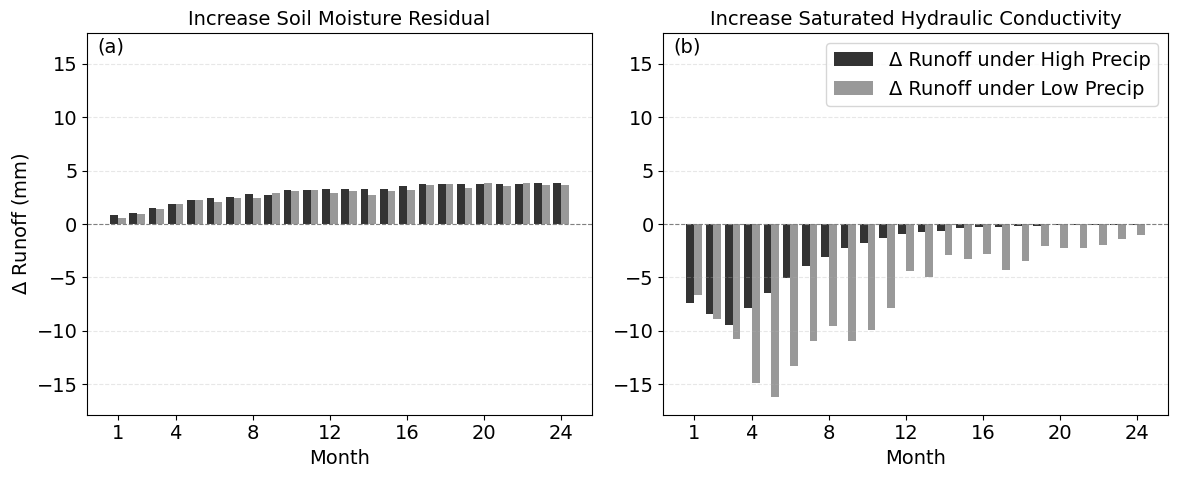

In [ ]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean3, high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean3,  low_runoff_diff_mean5]

titles = ['Increase Soil Moisture Residual',
          'Increase Saturated Hydraulic Conductivity']
all_vals = np.concatenate(high_y_list + low_y_list)
ymax = np.max(np.abs(all_vals)) * 1.10
ymin, ymax = -ymax, ymax

fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

def plot_bar(ax, high_y, low_y, title, ylabel, ymin, ymax):
    x_high, x_low = x - bar_width/2, x + bar_width/2
    ax.bar(x_high, high_y, width=bar_width, color='k', alpha=0.8, label='High Precip')
    ax.bar(x_low,  low_y,  width=bar_width, color='grey', alpha=0.8, label='Low Precip')
    ax.set_ylim(ymin, ymax)
    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    xticks = [1] + list(np.arange(4, 24, 4)) + [24]
    ax.set_xticks(xticks)
    ax.grid(True, axis='y', ls='--', alpha=0.3)
    ax.set_title(title, fontsize=14)

ax1 = fig.add_subplot(gs[0,0])
plot_bar(ax1, high_y_list[0], low_y_list[0], titles[0], r'$\Delta$ Runoff (mm)', ymin, ymax)

ax2 = fig.add_subplot(gs[0,1], sharex=ax1, sharey=ax1)
plot_bar(ax2, high_y_list[1], low_y_list[1], titles[1], r'$\Delta$ Runoff (mm)', ymin, ymax)
ax2.set_ylabel('')

legend_elements = [
    Patch(facecolor='k', alpha=0.8, label='Δ Runoff under High Precip'),
    Patch(facecolor='grey', alpha=0.8, label='Δ Runoff under Low Precip')
]
ax2.legend(handles=legend_elements, fontsize=14, loc='upper right')

ax1.text(0.02, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
plt.show()

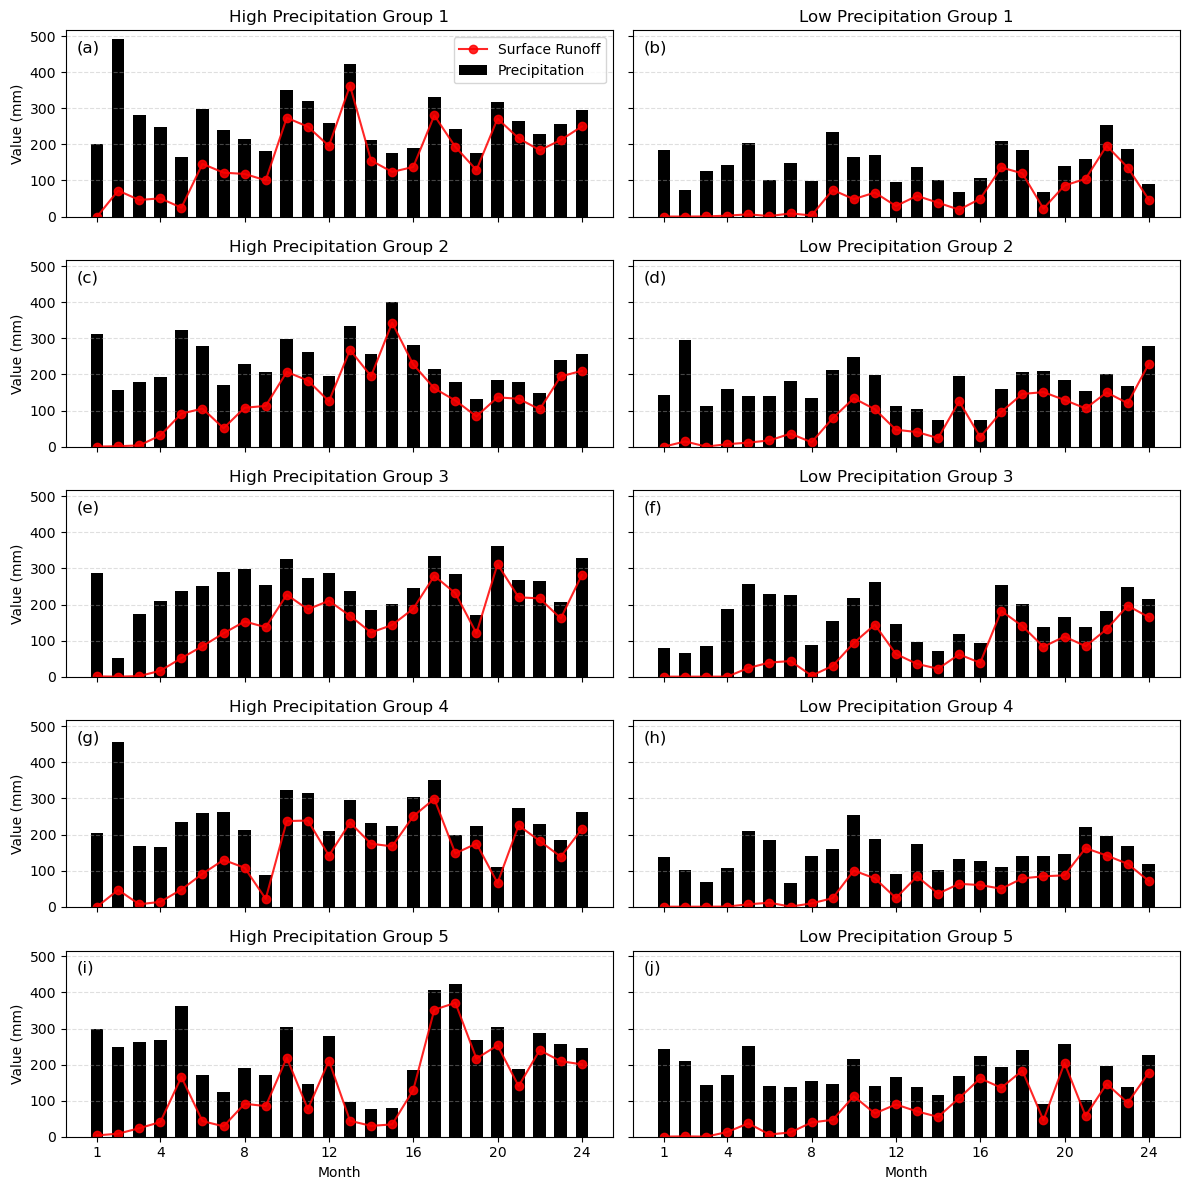

In [85]:
high_con_monthly_precip_mean2 = np.zeros((5,24))
for i in range(5):
    ds = globals()[high_con_vars[i]]
    high_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
low_con_monthly_precip_mean2 = np.zeros((5,24))
for i in range(5):
    ds = globals()[low_con_vars[i]]
    low_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)

fig, axes = plt.subplots(5, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()


for i in range(5):
    ax = axes[i * 2]
    precip = high_con_monthly_precip_mean2[i, :]
    runoff = high_con_monthly_surrunoff_mean2[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)

    if i == 0:
        ax.legend(loc='upper right')
    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(xticks)

    ax.set_title(f'High Precipitation Group {i+1}', fontsize=12)
    ax.set_ylabel('Value (mm)', fontsize=10)
    # ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

for i in range(5):
    ax = axes[i * 2 + 1]
    precip = low_con_monthly_precip_mean2[i, :]
    runoff = low_con_monthly_surrunoff_mean2[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='Low Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)

    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(xticks)
        
    ax.set_title(f'Low Precipitation Group {i+1}', fontsize=12)
    # ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

text = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)','(h)', '(i)', '(j)']
for i in range(10):
    ax = axes[i]
    ax.text(0.02, 0.88, text[i], transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [61]:
for i, title in enumerate(titles):
    high_diff = high_y_list[i]
    low_diff  = low_y_list[i]

    high_ratio = (high_diff / np.mean(high_con_monthly_surrunoff_mean, axis=0)) * 100
    low_ratio  = (low_diff  / np.mean(low_con_monthly_surrunoff_mean, axis=0)) * 100

    df = pd.DataFrame({
        'Month': x,
        'High Precip ΔRunoff Ratio': [f"{v:.2f}%" for v in high_ratio],
        'Low Precip ΔRunoff Ratio':  [f"{v:.2f}%" for v in low_ratio]
    })

    filename = f"runoff_ratio_{i+1}.xlsx"
    df.to_excel(filename, index=False)

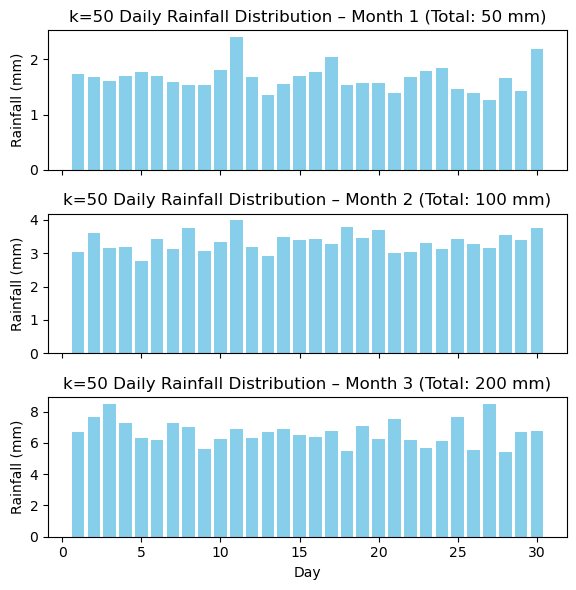

In [ ]:
def distribute_monthly_rainfall(
    total_monthly_rainfall: NDArray[np.floating],
    num_days: int,
    seed: int | None = None,
) -> NDArray[np.floating]:
    
    rng = np.random.default_rng(seed)
    daily_rainfall_data = []

    shape_k = 50 
    scale_theta = 1.0 

    for rainfall in total_monthly_rainfall:
        if rainfall <= 0:
            daily_rainfall_data.append(np.zeros(num_days))
            continue

        weights = gamma.rvs(a=shape_k, scale=scale_theta, size=num_days, random_state=rng)

        weights /= np.sum(weights)

        daily_rainfall = rainfall * weights
        daily_rainfall_data.append(daily_rainfall)

    return np.array(daily_rainfall_data)

test_rainfall = np.array([50, 100, 200]) 
num_days = 30
seed = None
result = distribute_monthly_rainfall(test_rainfall, num_days, seed)

fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
for i, month_data in enumerate(result): 
    ax = axes[i]
    ax.bar(np.arange(1, num_days + 1), month_data, color='skyblue')
    ax.set_title(f"k=50 Daily Rainfall Distribution – Month {i+1} (Total: {test_rainfall[i]} mm)")
    ax.set_ylabel("Rainfall (mm)")
axes[-1].set_xlabel("Day") 

plt.tight_layout()
plt.show()

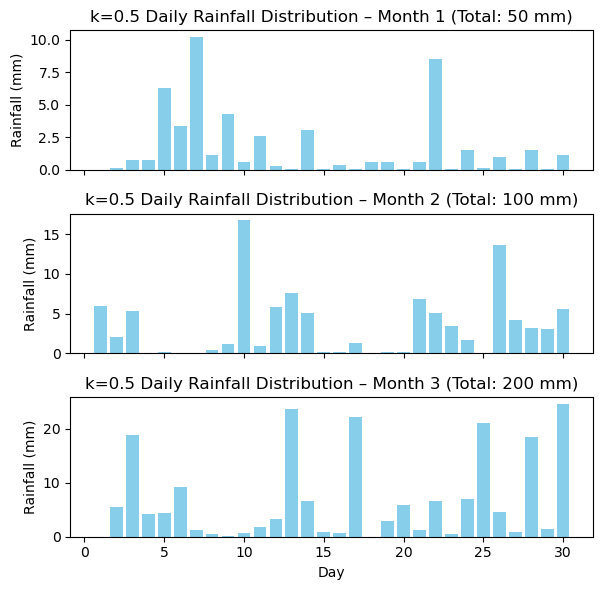

In [58]:
def distribute_monthly_rainfall(
    total_monthly_rainfall: NDArray[np.floating],
    num_days: int,
    seed: int | None = None,
) -> NDArray[np.floating]:
    
    rng = np.random.default_rng(seed)
    daily_rainfall_data = []

    shape_k = 0.5
    scale_theta = 1.0 

    for rainfall in total_monthly_rainfall:
        if rainfall <= 0:
            daily_rainfall_data.append(np.zeros(num_days))
            continue

        weights = gamma.rvs(a=shape_k, scale=scale_theta, size=num_days, random_state=rng)

        weights /= np.sum(weights)

        daily_rainfall = rainfall * weights
        daily_rainfall_data.append(daily_rainfall)

    return np.array(daily_rainfall_data)

test_rainfall = np.array([50, 100, 200]) 
num_days = 30
seed = None
result = distribute_monthly_rainfall(test_rainfall, num_days, seed)

fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
for i, month_data in enumerate(result): 
    ax = axes[i]
    ax.bar(np.arange(1, num_days + 1), month_data, color='skyblue')
    ax.set_title(f"k=0.5 Daily Rainfall Distribution – Month {i+1} (Total: {test_rainfall[i]} mm)")
    ax.set_ylabel("Rainfall (mm)")
axes[-1].set_xlabel("Day") 

plt.tight_layout()
plt.show()

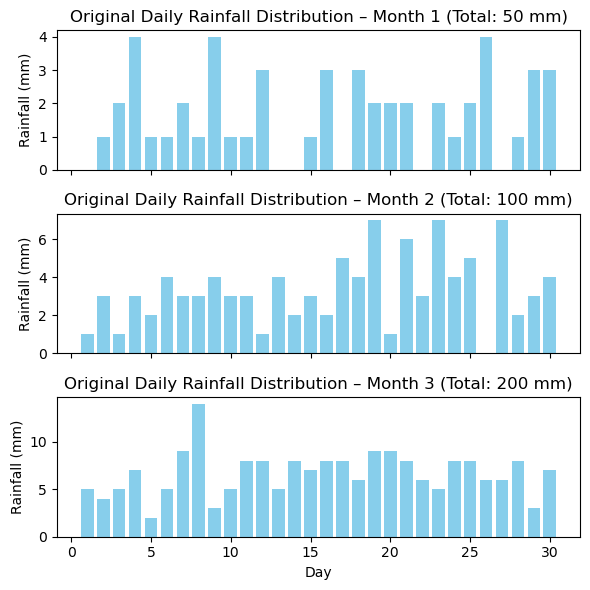

In [59]:
def distribute_monthly_rainfall(
    total_monthly_rainfall: NDArray[np.floating],
    num_days: int,
    seed: int | None = None,
) -> NDArray[np.floating]:
    rng = np.random.default_rng(seed)

    daily_rainfall_data = []
    for rainfall in total_monthly_rainfall:
        daily_rainfall = np.zeros(num_days)

        for _ in range(int(rainfall)):
            day = rng.integers(0, num_days, seed) 
            daily_rainfall[day] += 1.0  
        if np.sum(daily_rainfall > 0):
            daily_rainfall *= rainfall / np.sum(daily_rainfall)
        else:
            daily_rainfall[:] = 0
        daily_rainfall_data.append(daily_rainfall)

    return np.nan_to_num(np.array(daily_rainfall_data), nan=0.0)

test_rainfall = np.array([50, 100, 200]) 
num_days = 30
seed = None
result = distribute_monthly_rainfall(test_rainfall, num_days, seed)

fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
for i, month_data in enumerate(result): 
    ax = axes[i]
    ax.bar(np.arange(1, num_days + 1), month_data, color='skyblue')
    ax.set_title(f"Original Daily Rainfall Distribution – Month {i+1} (Total: {test_rainfall[i]} mm)")
    ax.set_ylabel("Rainfall (mm)")
axes[-1].set_xlabel("Day") 

plt.tight_layout()
plt.show()

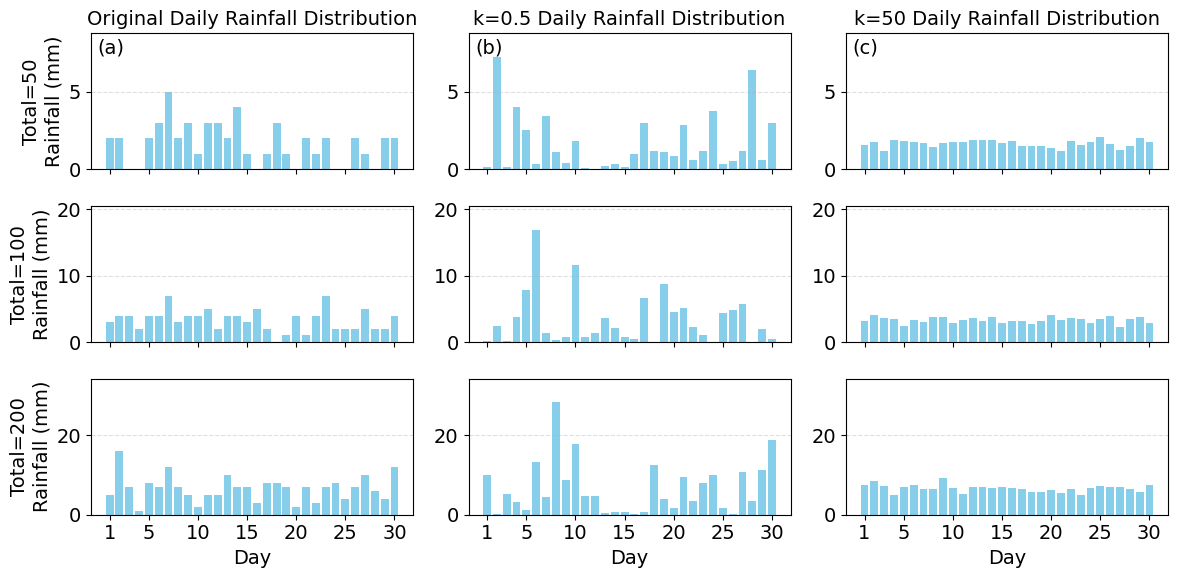

In [ ]:
def distribute_gamma_highk(total_monthly_rainfall: NDArray[np.floating], num_days: int, seed=None) -> NDArray[np.floating]:
    rng = np.random.default_rng(seed)
    data = []
    for rainfall in total_monthly_rainfall:
        if rainfall <= 0:
            data.append(np.zeros(num_days))
            continue
        w = gamma.rvs(a=50, scale=1.0, size=num_days, random_state=rng)
        w /= np.sum(w)
        data.append(rainfall * w)
    return np.array(data)

def distribute_gamma_lowk(total_monthly_rainfall: NDArray[np.floating], num_days: int, seed=None) -> NDArray[np.floating]:
    rng = np.random.default_rng(seed)
    data = []
    for rainfall in total_monthly_rainfall:
        if rainfall <= 0:
            data.append(np.zeros(num_days))
            continue
        w = gamma.rvs(a=0.5, scale=1.0, size=num_days, random_state=rng)
        w /= np.sum(w)
        data.append(rainfall * w)
    return np.array(data)

def distribute_original(total_monthly_rainfall: NDArray[np.floating], num_days: int, seed=None) -> NDArray[np.floating]:
    rng = np.random.default_rng(seed)
    data = []
    for rainfall in total_monthly_rainfall:
        d = np.zeros(num_days)
        for _ in range(int(rainfall)):
            d[rng.integers(0, num_days)] += 1
        if np.sum(d) > 0:
            d *= rainfall / np.sum(d)
        data.append(d)
    return np.array(data)

# ====== 参数 ======
test_rainfall = np.array([50, 100, 200])
num_days = 30
seed = None
xticks2 = [1] + list(np.arange(5, 30, 5)) + [30]

distributions = [
    (distribute_original(test_rainfall, num_days, seed), "Original Daily Rainfall Distribution"),
    (distribute_gamma_lowk(test_rainfall, num_days, seed), "k=0.5 Daily Rainfall Distribution"),
    (distribute_gamma_highk(test_rainfall, num_days, seed), "k=50 Daily Rainfall Distribution")
]

row_ymax = [max([dist[0][r].max() for dist in distributions]) * 1.1 for r in range(3)]

plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(12, 6), sharex=True)  

labels = ['(a)', '(b)', '(c)']

for row in range(3):
    ymax = row_ymax[row] * 1.1

    for col, ((result, title), label) in enumerate(zip(distributions, labels)):
        ax = axes[row, col]
        ax.bar(np.arange(1, num_days + 1), result[row], color='skyblue')
        ax.set_ylim(0, ymax)
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)
        ax.set_xticks(xticks2)
        if row == 2:
            ax.set_xticklabels([str(i) for i in xticks2])
            ax.set_xlabel("Day", fontsize=14)
        else:
            ax.set_xticklabels([])

        if row == 0:
            ax.set_title(title, fontsize=14)
            ax.text(0.02, 0.85, label, transform=ax.transAxes, fontsize=14)
        if col == 0:
            ax.set_ylabel(f"Total={test_rainfall[row]}\nRainfall (mm)", fontsize=14)

plt.tight_layout()
plt.show()

In [101]:
for i, title in enumerate(titles):
    high_diff = high_y_list[i]
    low_diff  = low_y_list[i]

    high_ratio = (high_diff / np.mean(high_con_monthly_surrunoff_mean, axis=0)) * 100
    low_ratio  = (low_diff  / np.mean(low_con_monthly_surrunoff_mean, axis=0)) * 100

    df = pd.DataFrame({
        'Month': x,
        'High Precip ΔRunoff Ratio': [f"{v:.2f}%" for v in high_ratio],
        'Low Precip ΔRunoff Ratio':  [f"{v:.2f}%" for v in low_ratio]
    })

    filename = f"runoff_ratio_{i+1}.xlsx"
    df.to_excel(filename, index=False)


In [102]:
for key in high_experiments:
    globals()[f"c0H{key}"] = xr.load_dataset(f"{path_1}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c0L{key}"] = xr.load_dataset(f"{path_1}/l{key}/all_continuous_data.nc")

for key in high_experiments:
    globals()[f"c02H{key}"] = xr.load_dataset(f"{path_2}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c02L{key}"] = xr.load_dataset(f"{path_2}/l{key}/all_continuous_data.nc")

high0_con_vars = [
    'c0H0821', 'c0H1107', 'c0H1710', 'c0H7784', 'c0H9924'
]
low0_con_vars = [
    'c0L0290', 'c0L0397', 'c0L0592', 'c0L2304', 'c0L9482'
]

high0_con_vars2 = [
    'c02H0821', 'c02H1107', 'c02H1710', 'c02H7784', 'c02H9924'
]
low0_con_vars2 = [
    'c02L0290', 'c02L0397', 'c02L0592', 'c02L2304', 'c02L9482'
]


In [103]:
high0_con_monthly_precip_mean = np.zeros((5,24))
high0_con_monthly_surrunoff_mean = np.zeros((5,24)) #(24,81)
for i in range(5):
    ds = globals()[high0_con_vars[i]]
    high0_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high0_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
# high0_precip_compare = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean])
# high0_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean, high0_con_monthly_surrunoff_mean])

low0_con_monthly_precip_mean = np.zeros((5,24))
low0_con_monthly_surrunoff_mean = np.zeros((5,24))
for i in range(5):
    ds = globals()[low0_con_vars[i]]
    low0_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low0_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
# low0_precip_compare = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean])
# low0_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean])

high0_con_monthly_precip_mean2 = np.zeros((5,24))
high0_con_monthly_surrunoff_mean2 = np.zeros((5,24)) #(24,81)
for i in range(5):
    ds = globals()[high0_con_vars2[i]]
    high0_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high0_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
# high0_precip_compare2 = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean2])
# high0_surrunoff_compare2 = np.vstack([high_con_monthly_surrunoff_mean, high0_con_monthly_surrunoff_mean2])
high0_precip_compare = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean, high0_con_monthly_precip_mean2])
high0_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean,high0_con_monthly_surrunoff_mean2, high0_con_monthly_surrunoff_mean])

low0_con_monthly_precip_mean2 = np.zeros((5,24))
low0_con_monthly_surrunoff_mean2 = np.zeros((5,24))
for i in range(5):
    ds = globals()[low0_con_vars2[i]]
    low0_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low0_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
# low0_precip_compare2 = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean2])
# low0_surrunoff_compare2 = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean2])
low0_precip_compare = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean, low0_con_monthly_precip_mean2])
low0_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean2, low0_con_monthly_surrunoff_mean])

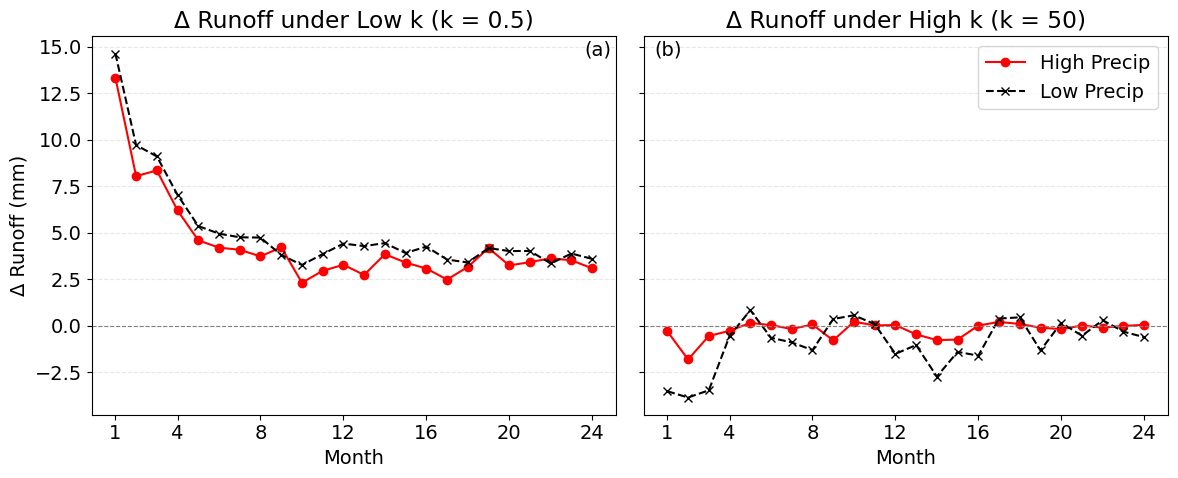

In [118]:
delta_high_lowk = np.mean(high0_con_monthly_surrunoff_mean - high_con_monthly_surrunoff_mean, axis=0)
delta_low_lowk  = np.mean(low0_con_monthly_surrunoff_mean  - low_con_monthly_surrunoff_mean, axis=0)

delta_high_highk = np.mean(high0_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean, axis=0)
delta_low_highk  = np.mean(low0_con_monthly_surrunoff_mean2  - low_con_monthly_surrunoff_mean, axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
xticks = [1] + list(np.arange(4, 24, 4)) + [24]

ax1.plot(x, delta_high_lowk, label='High Precip', color='r', marker='o')
ax1.plot(x, delta_low_lowk,  label='Low Precip',  color='k', linestyle='--', marker='x')
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax1.set_title('Δ Runoff under Low k (k = 0.5)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Δ Runoff (mm)')
ax1.set_xticks(xticks)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

ax2.plot(x, delta_high_highk, label='High Precip', color='r', marker='o')
ax2.plot(x, delta_low_highk,  label='Low Precip',  color='k', linestyle='--', marker='x')
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_title('Δ Runoff under High k (k = 50)')
ax2.set_xlabel('Month')
ax2.set_xticks(xticks)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.legend()

ax1.text(0.94, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)
ax2.text(0.02, 0.95, '(b)', transform=ax2.transAxes, fontsize=14)

plt.tight_layout()
plt.show()

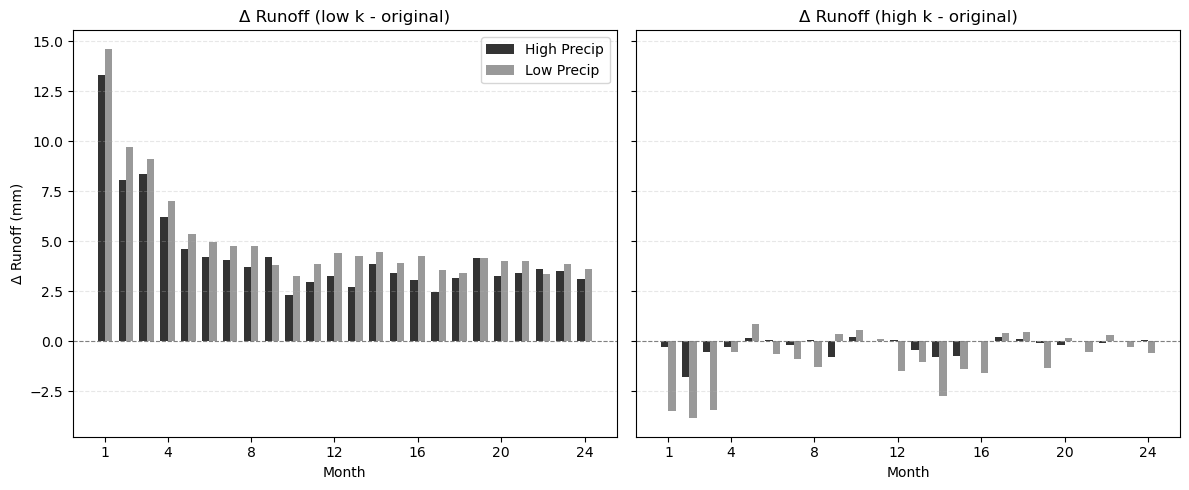

In [ ]:
bar_width = 0.35

delta_high_lowk = np.mean(high0_con_monthly_surrunoff_mean - high_con_monthly_surrunoff_mean, axis=0)
delta_low_lowk  = np.mean(low0_con_monthly_surrunoff_mean  - low_con_monthly_surrunoff_mean, axis=0)

delta_high_highk = np.mean(high0_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean, axis=0)
delta_low_highk  = np.mean(low0_con_monthly_surrunoff_mean2  - low_con_monthly_surrunoff_mean, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax = axes[0]
x_high = x - bar_width / 2
x_low  = x + bar_width / 2

ax.bar(x_high, delta_high_lowk, width=bar_width, color='black', alpha=0.8, label='High Precip')
ax.bar(x_low,  delta_low_lowk,  width=bar_width, color='gray',  alpha=0.8, label='Low Precip')

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff (low k - original)')
ax.set_xlabel('Month')
ax.set_ylabel('Δ Runoff (mm)')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()

ax = axes[1]
x_high = x - bar_width / 2
x_low  = x + bar_width / 2

ax.bar(x_high, delta_high_highk, width=bar_width, color='black', alpha=0.8, label='High Precip')
ax.bar(x_low,  delta_low_highk,  width=bar_width, color='gray',  alpha=0.8, label='Low Precip')

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff (high k - original)')
ax.set_xlabel('Month')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()